In [ ]:
import numpy as np

In [ ]:
rundir='ConvergenceTest/'
runprefix='Run'
filename='/twostarsoneplanet'

In [ ]:
tarr=[]
dtarr =[]
Linitarr=[]
pinitarr=[]
Einitarr=[]
deltaparr=[]
deltaEarr=[]
deltaLarr=[]
Lorbarr=[]
porbarr=[]
Eorbarr=[]

In [4]:
import csv
#varname=dtarr, L0arr
#typename ='dtarr.csv', 'L0arr.csv'
def load1D(rundir,runprefix,n,filename,typename):
    with open(rundir+runprefix+str(n)+filename+typename, newline='') as csvfile:
        varnamelist = list(csv.reader(csvfile))
    varname=np.zeros(len(varnamelist))
    count =0
    for row in varnamelist:
        for item in row:
            number = float(item)
            varname[count]=number
        count+=1
    return varname

In [5]:
import csv

def load2D(rundir,runprefix,n,filename, typename):
    with open(rundir+runprefix+str(n)+filename+typename,newline='') as csvfile:
        varnamelist = list(csv.reader(csvfile))
    varname=np.zeros([len(varnamelist),len(varnamelist[0])])
    rownum=0
    col=0
    for row in varnamelist:
        for item in row:
            number = float(item)
            varname[rownum][col]=number
            col+=1
        col=0
        rownum+=1
    return varname

In [6]:
import json
def loadJSON(rundir,runprefix,n,filename):
    
    paramsdict={}
    import json 
    with open(rundir+runprefix+str(n)+filename+'params.json') as jsonfile:
        paramsdict = json.load(jsonfile)
    return paramsdict

In [7]:
for i in range(3,8):
        t=load1D(rundir,runprefix,i,filename, 'dtarr.csv')
        tarr.append(t)
        #L0=load1D(rundir,runprefix,i,filename,'L0arr.csv')
        #L0arr.append(L0)
        deltaE = load2D(rundir,runprefix,i,filename,'deltaEarr.csv')
        deltaEarr.append(deltaE)
        deltaL = load2D(rundir,runprefix,i,filename,'deltaLarr.csv')
        deltaLarr.append(deltaL)
        deltap = load2D(rundir,runprefix,i,filename,'deltaparr.csv')
        deltaparr.append(deltap)
        #Einit=load1D(rundir,runprefix,i,filename,'Einitarr.csv')
        #Einitarr.append(Einit)
        #Linit=load2D(rundir,runprefix,i,filename,'Linitarr.csv')
        #Linitarr.append(Linit)
        #pinit=load2D(rundir,runprefix,i,filename,'pinitarr.csv')
        #pinitarr.append(pinit)
        #Lorb=load2D(rundir,runprefix,i,filename,'Lorbarr.csv')
        #Lorbarr.append(Lorb)
        #porb=load2D(rundir,runprefix,i,filename,'porbarr.csv')
        #porbarr.append(porb)
        #Eorb=load2D(rundir,runprefix,i,filename,'Eorbarr.csv')
        params=loadJSON(rundir,runprefix,i,filename)
        dt=params['dt']
        dtarr.append(dt)

In [ ]:
dtarr

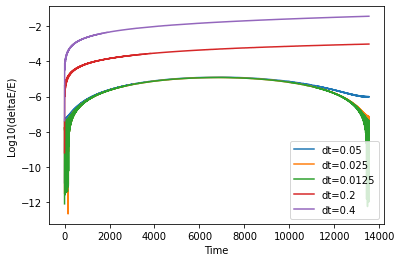

In [16]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
plt.xlabel('Time')
plt.ylabel('Log10(deltaE/E)')
plt.title('')
for i in range(len(dtarr)):
    temptimes=tarr[i]
    temp = deltaEarr[i]
    #print(i,len(temptimes),len(temp), max(temptimes))
    temparr=np.array(temp)
    #print(temparr[0:10])
    logtemparr=np.log10(temparr)
    ax.plot(temptimes,logtemparr,label='dt='+str(dtarr[i]))
ax.legend(loc="lower right")
plt.show()